# Comparación de Solución Analítica vs. Numérica - Dataset Income

En éste notebook vamos a comparar los resultados obtenidos para el dataset de income-happiness con la solución cerrada de las clases 3 y 4, con los métodos de optimización vistos en la clase (GD, SGD y MBGD). Compararemos asimismo los tiempos de ejecución de éstos tres métodos.

### Cargamos las librerías

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
import sys  
sys.path.insert(0, '../../clase_3/ejercicios/src')

### Cargamos los módulos de métricas, dataset, modelos y optimización

In [3]:
from dataset_income import Data
from metrics import MSE
from models import ConstantModel, LinearRegression, LinearRegressionWithB
from gradient_descent import gradient_descent, stochastic_gradient_descent, mini_batch_gradient_descent

### Cargamos y Analizamos los Datos

In [5]:
# Cargamos los datos

dataset = Data(r'../../clase_3/ejercicios/data/income.csv')
X_train, X_test, y_train, y_test = dataset.split(0.8)

In [6]:
X_train.shape

(398,)

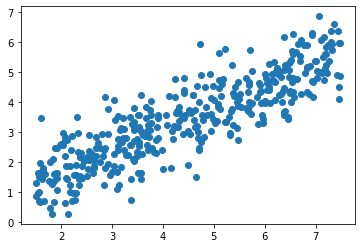

In [8]:
plt.scatter(X_train, y_train)
plt.show()

### Corremos los modelos (solución cerrada)

In [9]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
lr_y_hat = linear_regression.predict(X_test)

In [10]:
linear_regression_b = LinearRegressionWithB()
linear_regression_b.fit(X_train, y_train)
lrb_y_hat = linear_regression_b.predict(X_test)

In [11]:
constant_model = ConstantModel()
constant_model.fit(X_train, y_train)
ct_y_hat = constant_model.predict(X_test)

In [12]:
mse = MSE()
lr_mse = mse(y_test, lr_y_hat)
lrb_mse = mse(y_test, lrb_y_hat)
ct_mse = mse(y_test, ct_y_hat)

In [13]:
x_plot = np.linspace(0, 10, 10)
lr_y_plot = linear_regression.model * x_plot
lrb_y_plot = linear_regression_b.model[0] * x_plot + linear_regression_b.model[1]

### Corremos los Optimizadores (solución numérica)

#### Gradient Descent

In [14]:
# run gradient descent and compare with the linear model (no intercept)
print('GRADIENT DESCENT VS LINEAR REGRESSION')

# Hyperparameters

# Set up the learning rate
lr_1 = 0.001
# Set up the n° of epochs
amt_epochs_1 = 1000

# Calculate algorithm time
start = time.time()
# Get the weights "manually"
W_manual = gradient_descent(X_train.reshape(-1, 1), y_train.reshape(-1, 1), lr=lr_1, amt_epochs=amt_epochs_1)
time_1 = time.time() - start
# Compare with the closed form weights
W_real = linear_regression.model

print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.format(W_manual.reshape(-1), W_real, time_1))

GRADIENT DESCENT VS LINEAR REGRESSION
W_manual:  [0.7611742]
W_real:    0.7611741959511212
Manual time [s]: 0.015799283981323242


In [15]:
# run gradient descent and compare with the affine model (with intercept)

print('GRADIENT DESCENT VS LINEAR REGRESSION WITH B')
# Expand the input with a column of "1"
X_expanded = np.vstack((X_train, np.ones(len(X_train)))).T

# Hyperparameters

# Set up the learning rate
lr_2 = 0.001
# Set up the n° of epochs
amt_epochs_2 = 100000

# Calculate algorithm time
start = time.time()
# Get the weights "manually"
W_manual = gradient_descent(X_expanded, y_train.reshape(-1, 1), lr=lr_2, amt_epochs=amt_epochs_2)
time_2 = time.time() - start
# Compare with the closed form weights
W_real = linear_regression_b.model

print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.format(W_manual.reshape(-1), W_real, time_2))

GRADIENT DESCENT VS LINEAR REGRESSION WITH B
W_manual:  [0.70358195 0.29528936]
W_real:    [0.70358195 0.29528936]
Manual time [s]: 1.228255271911621


#### Stochastic Gradient Descent

In [16]:
# run stochastic gradient descent and compare with the affine model (with intercept)

print('STOCHASTIC GRADIENT DESCENT VS LINEAR REGRESSION WITH B')
# Expand the input with a column of "1"
X_expanded = np.vstack((X_train, np.ones(len(X_train)))).T

# Hyperparameters

# Set up the learning rate
lr_3 = 0.05
# Set up the n° of epochs
amt_epochs_3 = 1000

# Calculate algorithm time
start = time.time()
# Get the weights "manually"
W_manual = stochastic_gradient_descent(X_expanded, y_train.reshape(-1, 1), lr=lr_3, amt_epochs=amt_epochs_3)
time_3 = time.time() - start
# Compare with the closed form weights
W_real = linear_regression_b.model
print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.format(W_manual.reshape(-1), W_real, time_3))

STOCHASTIC GRADIENT DESCENT VS LINEAR REGRESSION WITH B
W_manual:  [0.71386272 0.29732352]
W_real:    [0.70358195 0.29528936]
Manual time [s]: 3.4144303798675537


#### Mini-Batch Gradient Descent

In [17]:
# run mini-batch gradient descent and compare with the affine model (with intercept)

print('MINI BATCH GRADIENT DESCENT VS LINEAR REGRESSION WITH B')
# Expand the input with a column of "1"
X_expanded = np.vstack((X_train, np.ones(len(X_train)))).T

# Hyperparameters

# Set up the learning rate
lr_4 = 0.05
# Set up the n° of epochs
amt_epochs_4 = 5000

# Calculate algorithm time
start = time.time()
# Get the weights "manually"
W_manual = mini_batch_gradient_descent(X_expanded, y_train.reshape(-1, 1), lr=lr_4, amt_epochs=amt_epochs_4)
time_4 = time.time() - start
# Compare with the closed form weights
W_real = linear_regression_b.model

print('W_manual:  {}\nW_real:    {}\nManual time [s]: {}'.format(W_manual.reshape(-1), W_real, time_4))

MINI BATCH GRADIENT DESCENT VS LINEAR REGRESSION WITH B
W_manual:  [0.69880062 0.29455838]
W_real:    [0.70358195 0.29528936]
Manual time [s]: 1.103524923324585


### Gráficos

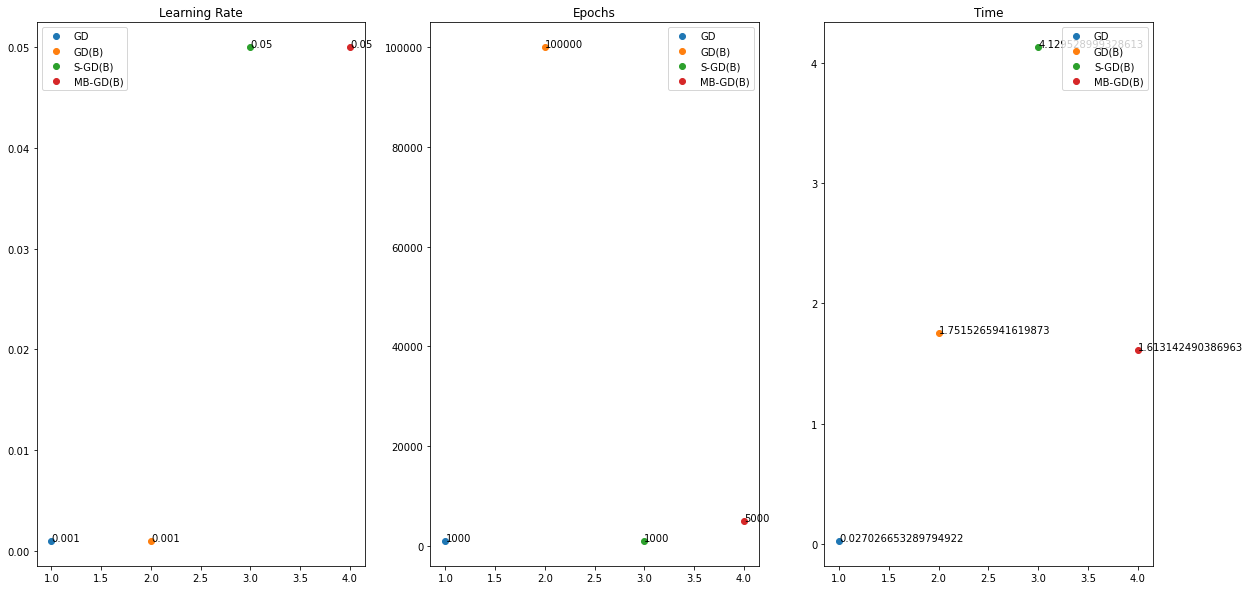

In [30]:
plt.figure(figsize=(20, 10))
x_plot = np.linspace(1, 4, 4)
legend = ['GD', 'GD(B)', 'S-GD(B)', 'MB-GD(B)']

plt.subplot(1, 3, 1)
plt.gca().set_title('Learning Rate')
y_plot = [lr_1, lr_2, lr_3, lr_4]
plt.plot(x_plot[0], y_plot[0], 'o', x_plot[1], y_plot[1], 'o', x_plot[2], y_plot[2], 'o', x_plot[3], y_plot[3], 'o')
plt.legend(legend)
for x, y in zip(x_plot, y_plot):
    plt.text(x, y, str(y))

plt.subplot(1, 3, 2)
plt.gca().set_title('Epochs')
y_plot = [amt_epochs_1, amt_epochs_2, amt_epochs_3, amt_epochs_4]
plt.plot(x_plot[0], y_plot[0], 'o', x_plot[1], y_plot[1], 'o', x_plot[2], y_plot[2], 'o', x_plot[3], y_plot[3], 'o')
plt.legend(legend)
for x, y in zip(x_plot, y_plot):
    plt.text(x, y, str(y))

plt.subplot(1, 3, 3)
plt.gca().set_title('Time')
y_plot = [time_1, time_2, time_3, time_4]
plt.plot(x_plot[0], y_plot[0], 'o', x_plot[1], y_plot[1], 'o', x_plot[2], y_plot[2], 'o', x_plot[3], y_plot[3], 'o')
plt.legend(legend)
for x, y in zip(x_plot, y_plot):
    plt.text(x, y, str(y))

plt.show()